# <center> <u>Software Mentions Classification</u></center>
##### <center><u>Specialization Project in Electrical Engineering</u> </center>
##### <center> <u>Submitted by Hafiz Muhammad Zohaib</u> </center>                                               
##### <center> <u>Supervised by David Schindler</u> </center>
##### <center> <u>Institute of Computer Science Engineering, University of Rostock </u></center>


<a id="PDS"></a>
<h1><u>Problem Description and Approach to Solution</u></h1>

In order to findout software mentions present in our text, we have to decide which kind of problem we have and which of the above methods can be employed for solution.Our main task is to develop a model to classify the software names appearing in a given sentence according to the context in which it is being used. There are four classes of software mentions as described above. We have to assign one class to  software name being appeared in sentence according to the context. 

This problem can be seen as <b>Classification</b> problem or <b>Named Entity Recognition/Sequence Labelling </b>problem.
<a id="MLC"></a>
<h2><u>Multi-Class Classification</u></h2>

Multi-class Classification is defined as classifying the instances into one of many classes(classifying instances into one of two classes is called binary classification). We have total four classes, so we can see our problem as to classify software mention into one of four classes.
<a id="NER"></a>
<h2><u>Named Entity Recognition</u></h2>

Named Entity Recognition (NER) is a problem of identifying unique names of different type of entities such as persons, places or organizations etc in text data. In our problem, since we have to label only software names appearing in our sentence, therefore every other entity is useless for us. Such problem is more specifically be called as <b>Custom Named Entity Recognition </b> problem.
<b> For Example,</b> in this given sentence:<br>
 " We have used Excel for better understanding of results".<br>
 In above sentence, Excel is software name being mentioned in context of usage. Therefore, it will be assigned as <b>Usage</b> label. All other words will be assigned <b>'O'</b> label means 'others' because we do not care about them in our problem.

So our problem can either be considered as Multi-class classification problem or NER problem. Now we have to look for Model to perform these tasks on our text data. A model can be based on Machine Learning or Deep Learning. <b>Artificial intelligence (AI)</b> is a broad field. <b>Machine learning (ML)</b> is sub-field of AI and<b> deep learning</b> is sub-field of ML. More specifically, deep learning is advancement in machine learning. It uses neural network that gives intelligence to machines to make accurate decisions without help from humans.  



### Creating Environment by importing Required Modules
Modules are already built by python community which developers can use for ease and speedy completion of their tasks. Tensorflow, an end to end open-source Machine learning library is run on backend for providing suitable environment for our implementation. Following modules/libraries are being used for our task implementation;

In [1]:
from nltk import word_tokenize     # nltk library used for word tokenization
from nltk import tokenize
import re                          # re library used for Regular Expression Extraction
import nltk
import pandas as pd                # pandas used for Data Frames
import numpy as np                 # numpy used for array or matrix declaration
import operator
import itertools                   # itertools used for iterative obj
from os import walk                # os used for interacting with the operating system
from nltk import ngrams            
from nltk.corpus import stopwords  # stopwords of English language
import collections                 # to store collections of data like tuple,dict,set
import sys                         # to access systems specific parameters
import time                        # deals with time and epochs relation
import gc                          # Garbage collector module
import string                      # has string related functions
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import matplotlib.pyplot as plt    # plotting library for python 
import seaborn as sns              # data visualization library
%matplotlib inline

# Module used for machine learning models and evaluation
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import sklearn_crfsuite
from sklearn import pipeline
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint
from gensim.models import KeyedVectors,Word2Vec  # Module used for Word2Vec trained model
import eli5                                      # eli5 shows weights of labels/gives information about labels
import random                                    # to generate/initialize variables with random values 
from scipy import spatial

C:\Users\zohai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\zohai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
C:\Users\zohai\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as

### Path to .txt and .ann files 

In [2]:
Brat_data_path='BratDataf/'

### Function to call  IOB tagging function for all files  

In [3]:
def call_generate(Brat_data_path):
    files_ann=[]
    files_txt=[]
    
    for root, dirnames,filenames in walk(Brat_data_path):         # walk through all files available at Brat_data_path
        for i,file in enumerate(filenames):
                if(i%2==0):
                    files_ann.append(Brat_data_path+file)
                else:
                    files_txt.append(Brat_data_path+file)
    
    for i,file in enumerate(files_txt):
        file_read_generate_bio(files_ann[i],files_txt[i])
        

### Function for retrieving .ann file data

In [4]:
def retrieve_annfile_data(myfile_ann):
    cls=[]
    start=[]
    end=[]
    tokens=[]
    Annotations=[]
    for line in myfile_ann:
        _, loc, a_tokens= line.strip().split('\t')
        a_type,a_start, a_end=loc.split(" ")
        cls.append(a_type)
        start.append(int(a_start))
        end.append(int(a_end))
        tokens.append(a_tokens)
        
   
    return cls,start,end,tokens
    

<a id="FE"></a>
<h2>5.4. <u>Feature Engineering</u></h2>


Feature Engineering is the process of extracting features from text so that these can be used to improve the machine learning algorithms. For providing a basis to classifier for classification, these features are very important. Similarly, there can be certain text based features which may cost our classifier performance. We have to remove or modify them through feature engineering tools. 
We have computed some important features and then used them in our classifier as per its requirements.

These features will be explained in this section.

<a id="POS"></a>
<h3>4.1 <u>Part of Speech Tagging</u></h3>


Part of Speech tagging is the process of assigning a particular part of speech to every word in a sentence, based on both its definition and its context. POS tagging is really useful for a variety of NLP tasks. It helps in NER, Classification and other tasks.
There are eight main parts of speech in the English language: <b>pronoun, noun, verb, preposition, adverb, conjunction, adjective</b> and <b>interjection.</b>

We have used python library <b>nltk</b> ([[11]](#1) Loper & Bird, 2002) for POS tagging of our text. It will help us in computing <b>word based features</b>, really useful for classification tasks. For Example, if we have sentence like, 'We have developed Xylo software for achieving better results.'
The nltk library pos tagger gives the following result;

<b>[('We', 'PRP'), ('have', 'VBP'), ('developed', 'VBN'), ('Xylo', 'NNP'), ('software', 'NN'), ('for', 'IN'), ('achieving', 'VBG'), ('better', 'JJR'), ('results', 'NNS'), ('.', '.')]</b>

### .txt and .ann Files Reading , Generate POS tags and IOB Tagging

In [5]:
def file_read_generate_bio(File1,File2):    # File1 as annotation file, File2 as .txt file
    myfile=open(File2,'r',encoding='utf-8')
    myfile_ann=open(File1,'r',encoding='utf-8')
    file_Sentences_list=myfile.read()
    list_sentences=tokenize.sent_tokenize(file_Sentences_list)

    class_labels,b_index,e_index,S_names=retrieve_annfile_data(myfile_ann)   # .ann files read
    df=pd.DataFrame((list(zip(class_labels,b_index,e_index,S_names))), columns =['Classification','Start_Index', 'End_Index','Software_Name'] )
    df.sort_values('Start_Index')

    class_labels=df['Classification']
    b_index=df['Start_Index']
    e_index=df['End_Index']
    S_names=df['Software_Name']
    numchars=0
    no=0
    rel_lines=[]
    range_list=[]
    for i,ele in enumerate(b_index):
        range_list.append(range(b_index[i],e_index[i]))

    # initializing list  
    test_list_r = range_list
    for e in test_list_r:
        repl_char = 'ß'
        test_list = e 
        # Multiple indices Replace in String 
        # Using loop + join() 
        temp = list(file_Sentences_list) 
        for idx in test_list: 
            temp[idx] = repl_char 
            res = ''.join(temp) 
        file_Sentences_list=str(res)


    sen_tok=tokenize.sent_tokenize(file_Sentences_list)
    new_sen_tok=[]
    for sen in sen_tok:
        for word in word_tokenize(sen):
            if 'ß' in word:
                new_sen_tok.append(sen)
                break
    #######################################################           

    text=' '.join(new_sen_tok)
    replaced=S_names
   

    no=0
    tokenized_words=word_tokenize(text)
    for i,word in enumerate(tokenized_words):
        if 'ß' in word:
            tokenized_words[i]=tokenized_words[i].replace(tokenized_words[i],replaced[no])
            no=no+1
    o=0
  
    emp_list=[]
    words=[]
    wrd_list=[]
    for i,word in enumerate(tokenized_words):
        if(o==len(S_names)):
            for aa in tokenized_words[i:]:
                    emp_list.append('O')
                    wrd_list.append(aa)
            break
        if (word==replaced[o] ):
            words=word_tokenize(word)
            wrd_list.append(words[0])
            emp_list.append('B-'+ class_labels[o])
            for p in words[1:]:
                wrd_list.append(p)
                emp_list.append('I-'+ class_labels[o])
            o=o+1
            if(o==len(S_names)-1):
                for aa in tokenized_words[i+1:]:
                    wrd_list.append(aa)
                    emp_list.append('O')
                    break
        else:
            emp_list.append('O')
            wrd_list.append(word)
    
    # Part of Speech Tags 
    POS_tags=[]
    p_tags=[]
    POS_tags=nltk.pos_tag(wrd_list)
    for i in range(0,len(POS_tags)):
        p_tags.append(POS_tags[i][1])
     
    text1=' '.join(wrd_list)
     
    
    # Count for Sentence No
    global S_no
    count_print=0
    sentence_print_array=[]
    new_sen_tok=tokenize.sent_tokenize(text1)
    
    for i,sen in enumerate(new_sen_tok):
        count_print=len(word_tokenize(sen))
        if count_print>0:
            S_no=S_no+1
            for value in range(0,count_print):
                sentence_print_array.append(S_no)
     
    #print(File1) 
    # columns =['Sentence#', 'Words','POStags','IOBtag'] 
    dff=pd.DataFrame((list(zip(sentence_print_array,wrd_list,p_tags,emp_list)))) 
    dff.to_csv('balanced_data', encoding='utf-8',mode='a', header=False)   # save dataframe to .csv file

### Generate Data File having  columns = ['Sentence#', 'Words' , 'POStags' ,'IOBtag' ] 

In [6]:
# global variable
S_no=0
call_generate(Brat_data_path)

## Reading Data File  resulted  after Preprocessing

In [7]:
B_data=pd.read_csv('balanced_data', encoding='utf-8',header=None)

In [8]:
B_data

,0,1,2,3,4
0,0,1,Custom,NNP,O
1,1,1,Basic,NNP,B-Usage
2,2,1,code,NN,O
3,3,1,was,VBD,O
4,4,1,written,VBN,O
...,...,...,...,...,...
148051,194,5306,-,:,O
148052,195,5306,perfect,NN,O
148053,196,5306,matchDMM,SYM,O
148054,197,5306,-,:,O


In [9]:
# Assign coloumn names
B_data.columns = ['Index','Sentence #','Word','POS','IOB_Tag']  

In [10]:
B_data

,Index,Sentence #,Word,POS,IOB_Tag
0,0,1,Custom,NNP,O
1,1,1,Basic,NNP,B-Usage
2,2,1,code,NN,O
3,3,1,was,VBD,O
4,4,1,written,VBN,O
...,...,...,...,...,...
148051,194,5306,-,:,O
148052,195,5306,perfect,NN,O
148053,196,5306,matchDMM,SYM,O
148054,197,5306,-,:,O


### Words distribution across Software Mention classes

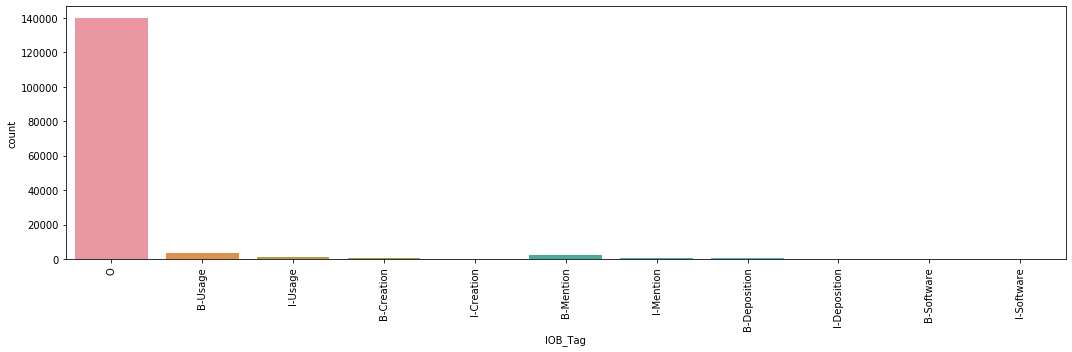

In [11]:
plt.figure(figsize=(15, 5))
ax = sns.countplot('IOB_Tag', data=B_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

### Words distribution across Software Mention classes without O tag

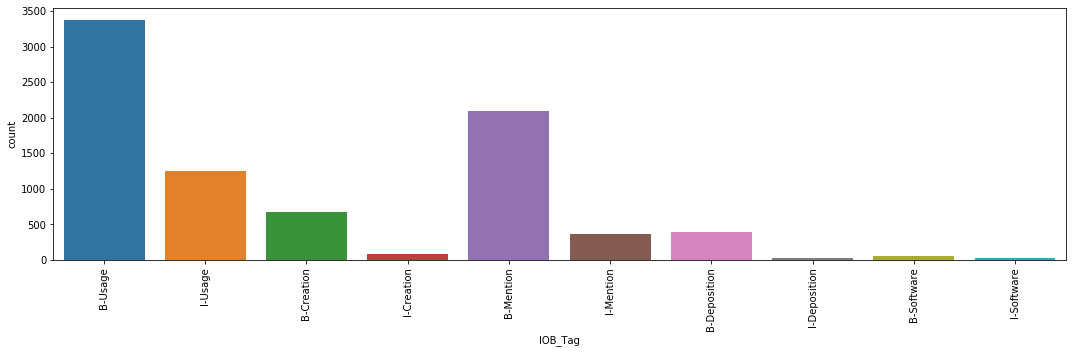

In [12]:

plt.figure(figsize=(15, 5))
ax = sns.countplot('IOB_Tag', data=B_data.loc[B_data['IOB_Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

### Words distribution across Part of Speech Tags for our data

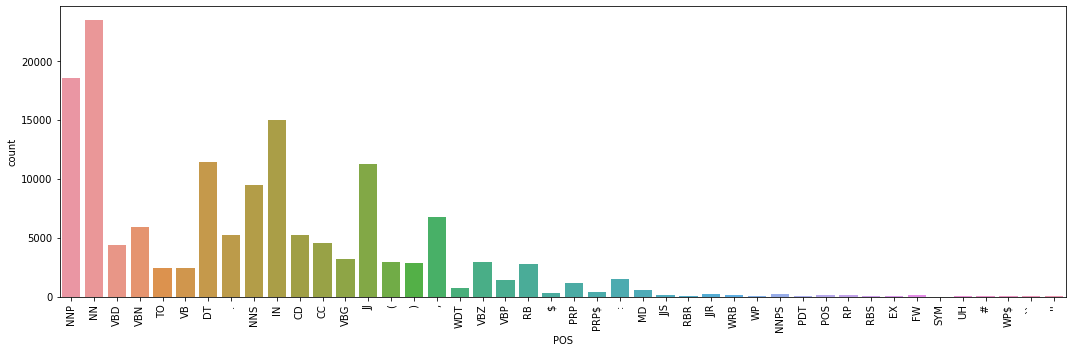

In [13]:
#Words distribution across POS
plt.figure(figsize=(15, 5))
ax = sns.countplot('POS', data=B_data, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

#### Replace Software Names with placeholder 'xyz' in order to not capture any features out of it.

In [14]:
# Replace B-Mentions (beginning) words in sentences with 'xyz'

B_data.loc[(B_data['IOB_Tag'] == 'B-Mention') | (B_data['IOB_Tag'] == 'B-Usage') |  (B_data['IOB_Tag'] == 'B-Creation')| 
           (B_data['IOB_Tag'] == 'B-Deposition'), 'Word'] = 'xyz'  

# # Replace I-Mentions (Inside) words empty string.


B_data.loc[(B_data['IOB_Tag'] == 'I-Mention') | (B_data['IOB_Tag'] == 'I-Usage') |  (B_data['IOB_Tag'] == 'I-Creation')| 
           (B_data['IOB_Tag'] == 'i-Deposition'), 'Word'] = ''  
        

### convert Data Frame form to sentence form

In [15]:
class getsentence(object):
    
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(word, pos, tag) for word, pos, tag in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["IOB_Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
getter = getsentence(B_data)
sentences = getter.sentences
#This is how a sentence will look like. 
print(sentences[0])


[('Custom', 'NNP', 'O'), ('xyz', 'NNP', 'B-Usage'), ('code', 'NN', 'O'), ('was', 'VBD', 'O'), ('written', 'VBN', 'O'), ('to', 'TO', 'O'), ('control', 'VB', 'O'), ('the', 'DT', 'O'), ('microscope', 'NN', 'O'), ('.', '.', 'O')]



### Data Seperation of every class sentences for preparing training and test data

In [16]:
B_Usage_Sentences=[]       # B-Usage tag sentences
B_Mention_Sentences=[]     # B-Mention Class sentences
B_Creation_Sentences=[]    # B-Creation tag sentences
B_Deposition_Sentences=[]  # B-Deposition tag sentences
Multi_class_sentences=[]   # Multi tag sentences
for i,sen in enumerate(sentences):
    empty_list=[]
    for element in sen:
        empty_list.append(element[2])
    if 'B-Usage' in empty_list and 'B-Mention' not in empty_list and 'B-Deposition' not in empty_list and 'B-Creation' not in empty_list:
        B_Usage_Sentences.append(sen)

    elif 'B-Mention' in empty_list and 'B-Usage' not in empty_list and 'B-Deposition' not in empty_list and 'B-Creation' not in empty_list:
        B_Mention_Sentences.append(sen)
    elif 'B-Creation' in empty_list and 'B-Usage' not in empty_list and 'B-Deposition' not in empty_list and 'B-Mention' not in empty_list:
        B_Creation_Sentences.append(sen)
    elif 'B-Deposition' in empty_list and 'B-Usage' not in empty_list and 'B-Creation' not in empty_list and 'B-Mention' not in empty_list:
        B_Deposition_Sentences.append(sen)
    else:
        Multi_class_sentences.append(sen)
    


### Training and test data Allocation whereas train data is 70% and test data is 30 %

In [17]:

train_data1= B_Usage_Sentences[0:(int(len(B_Usage_Sentences)*0.70)+1)] + B_Mention_Sentences[0:(int(len(B_Mention_Sentences)*0.70)+1)]+B_Creation_Sentences[0:(int(len(B_Creation_Sentences)*0.70)+1)]+ B_Deposition_Sentences[0:(int(len(B_Deposition_Sentences)*0.70)+1)]+ Multi_class_sentences[0:(int(len(Multi_class_sentences)*0.70)+1)]
test_data1=  B_Usage_Sentences[(int(len(B_Usage_Sentences)*0.70)+1):-1]+ B_Mention_Sentences[(int(len(B_Mention_Sentences)*0.70)+1):-1]+B_Creation_Sentences[(int(len(B_Creation_Sentences)*0.70)+1):-1]+ B_Deposition_Sentences[(int(len(B_Deposition_Sentences)*0.70)+1):-1]+ Multi_class_sentences[(int(len(Multi_class_sentences)*0.70)+1):-1]

train_data=random.sample(train_data1,len(train_data1))   # Shuffle train data 
test_data=random.sample(test_data1,len(test_data1))     # shuffle test data
complete_data=train_data + test_data

In [18]:
stop_words = string.punctuation  # list of English language stop words

### Function for capturing contextual words

In [19]:
def context_arrays(sentence,window):
    position=[]
    new_token=[]
    new_tokens_tags=[]
    new_pos_tags=[]
    
    pos_tags = [x[1] for x in sentence]
    tokens = [x[0] for x in sentence]
    NER_tags = [x[2] for x in sentence]
    
# remove stop words from sentences
    for token,tag,pos_tag in zip(tokens,NER_tags,pos_tags):
        if str(token) not in stop_words:
            new_token.append(token)
            new_tokens_tags.append(tag)
            new_pos_tags.append(pos_tag)
            
            

    for o,p in enumerate(new_token):
        if p=='xyz':
            position.append(o)
    y_act=[]
   
    for pos in position:
        y_act.append(new_tokens_tags[pos])
  
    
    X = []
    
    for pos in position:
        # number of Padding to left
        left_pad = max(window-pos,0)
        # number of Padding to right
        right_pad = max(window-len(new_token)+pos+1,0)  
        left_idx = window - left_pad
        right_idx = window - right_pad
        
        # POS tags for contextual array 
        row_pos = left_pad*["PAD"] +new_pos_tags[pos-left_idx:pos]+ [new_pos_tags[pos]] + new_pos_tags[pos+1:pos+1+right_idx] + right_pad*["PAD"]  #+  ['VBN' in new_pos_tags] + ['developed' in new_token]  
        
        # Contextual words array
        row_word = left_pad*["PAD"] + new_token[pos-left_idx:pos]+ [new_token[pos]] + new_token[pos+1:pos+1+right_idx] + right_pad*["PAD"] #+ ['source' in new_token]#+  #+ ['available' in new_token] + ['developed' in new_token]# tokens wrt to each word within a sentence
        
        # Features
        features=  ['VBN' in new_pos_tags]+ ['CD' in new_pos_tags]  +  [('used' in new_token) and ('by' in new_token)]+['integrated' in new_token]+['written' in new_token or 'implemented' in new_token]
        row= row_word +row_pos + features+ [len(new_token)]
        X.append(row)
        
    return X,y_act
            

In [20]:
train_row_data = list(map(lambda x: context_arrays(x,3), train_data)) ## context_arrays function with train_data as iterator
train_rows = [item[0] for item in train_row_data]
train_labels = [item[1] for item in train_row_data]
test_row_data = list(map(lambda x: context_arrays(x,3), test_data)) ## context_arrays function with test_data as iterator
test_rows = [item[0] for item in test_row_data]
test_labels = [item[1] for item in test_row_data]

# function for turning features or stack into  2D form
def rows_to_2d(rows, labels):
    X = []
    y = []
    for row,label in zip(rows,labels):
        for item, tag in zip(row, label):
            X.append(item)
            y.append(tag)
    return X,y

train_X, train_y = rows_to_2d(train_rows, train_labels)
test_X, test_y = rows_to_2d(test_rows, test_labels)

In [21]:
# check for length of label size and length of contextual array Dataset 
assert len(train_X) == len(train_y)
assert len(test_X) == len(test_y)

<a id="CFCW"></a> 
<h4><u>Capturing Features of Contextual Words</u></h4>

<br>
To get the features of contextual words, we use <b>Word Embeddings</b>.<br>
<b>Word Embeddings</b> are vector depiction of a specific word. It is one of the most famous representation of text vocabulary. These embedding are really good at capturing <b>semantic and syntactic similarity among words, context of a word</b> in a document and  <b>relation</b> with other words (<b>[12]</b> Mikolov, Chen, Corrado, & Dean, 2013).

<a id="W2V"></a>
<h4><u>Word2Vec Model</u></h4>

<br>
Word2Vec is a class of models that represent words in large text Corpus as a vector in n dimensional feature space and keep the similar words close in space. These two models are; <b>Skip-gram</b> and <b>Continuous Bag Of Words (CBOW)</b> illustrated by ( <b>[12]</b> Mikolov, Chen, Corrado, & Dean, 2013).
<p>
Machines do not understand our language words. Machines deal in numbers. Therefore, we need to convert our vocabulary words into numbers. There are two methods for it.</p>

1. One Hot Encoding
2. To use a Word2Vec model

<p><b> One Hot Encoding </b> just assigns a vector to every word in our dictionary/vocabulary. The vector size is simply equal to total number of words in our dictionary. Each word has specific index in dictionary.This encoding appends '1' at that index and zeroes at other indices in the vector. Hence, every word represents a unique vector in dictionary.
But there are problems with one hot encoding. As dictionary size becomes very large, the vector size increases. Thus this encoding produces sparse vectors and may increase machine computational work.</p>
    
<p>Another problem is that this encoding does not provide any clue about semantic meaning of two words in space.
Therfore, we require more efficient and reliable word embeddings.</p>

<p><b>Continuous Vectors</b> can be used to represent word in large corpus. They consist of real numbers instead of just 1's and 0's. Each real number represents a feature strength/weakness in vector space. Therefore, Continuous vectors might capture different semantic meaning of a word.</p>

<a id="skip-gram"></a>
<h4><u>Skip-gram Model</u></h4>

Skip-gram model is not a supervised model because we do not have labels for our training data. We may call it semi-supervised because instead of direct labels we have contextual words for learning in Neural Network.

In this word2vec model, the model tries to predict neighbouring words based on current word in a sentence. This model consists of simple neural network (NN) with one hidden layer. Hidden layer is layer that forms bridge between input and output layer of nodes. We trained this NN to get the weights of hidden layer associated nodes which actually represent the vector of word in training model.

For training, we create context-target word pairs sentences in our corpus. Other than this we set <b>window_size</b> value which defines the window in which pairs are made. A size of 2 means we make pairs of current t position word with words at t-2, t-1, t+1, t+2 positions. Let's take an example;

Consider the sentence, <b>"We created Excel Software"</b>
If we consider window_size of 2 then context-target pairs will be as follows;<br>


<a id="CTP"></a>

<table style="width:400px" >
  <tr>
    <th>Ist Word</th>
    <th>2nd Word</th>
    <th>3rd Word</th>
    <th>4th Word</th>
    <th>Context-Target Pairs </th>
  </tr>  
  <tr>
  <td style="background-color:powderblue;"><center>We</center></td>
    <td><center><i>created</i></center></td>
    <td><center><i>Excel</i></center></td>
    <td><center>Software</center></td>
    <td><center>(We,created),(We,Excel</center></td>
  </tr> 
  <tr>
    <td ><center><i>We</i></center></td>
    <td style="background-color:powderblue;"><center>created</center></td>
    <td><center><i>Excel</i></center></td>
    <td><center><i>Software</i></center></td>
    <td><center>(created,We),(created,Excel),(created,software)</center></td> 
  </tr>
  <tr>
      <td ><center><i>We</i></center></td>
      <td ><center><i>created</i></center></td>
    <td style="background-color:powderblue;"><center>Excel</center></td>
    <td><center><i>Software</i></center></td>
    <td><center>(Excel,We),(Excel,created),(Excel,Software)</center></td>
 </tr> 
  <tr>
      <td ><center>We</center></td>
      <td ><center><i>created</i></center></td>
      <td ><center><i>Excel</i></center></td>
      <td style="background-color:powderblue;"><center>Software</center></td>
      <td><center>(Software,created),(Software,Excel)</center></td>
  </tr>
</table>

<br>
<center><b>Table 4 Creation of Context-Target Pairs for Skip-gram Model Training</b></center>

In above table, the words with blue background are context words and italic words are target words.
Similarly on same pattern other pairs will be generated and used further. What we are actually doing is we are capturing word pairs which can be seen next to each other. This context information is used to make word embeddings in skip-gram model.

These extracted training samples will be used to find the probability of pairs to be seen in corpus.
Now we take one hot encoding of context word as an input to Neural Network with hidden layer with softmax layer on output. This layer converts the output vector of NN to probability vector representing the probability of word to be found at nearby position of context word in corpus. The whole purpose of this training is to create a neural network which predicts the nearby words but to have hidden layer <b>weights</b> that have been learned during training. These weights are actually the word embeddings.<br><br>


If we are given with a training sample with words in an order like {W1,W2,W3, ...,W<sub>T</sub>}, the goal of skip-gram Model is to maximize the average log probability [13].<br>

<b>[13]</b> $$ J(Ω)=\frac{1}{T} \sum\limits_{t=1}^T  \sum\limits_{-c<=j<=c,j≠0} log P ( Wt+j | Wt ) $$

where Ω is the model parameters to be optimized, c is the size of the training context around word Wt), and P(W<sub>t+j</sub> | W<sub>t</sub>)is the probability of seeing word W<sub>t+j</sub> given the centre word  W<sub>t</sub>. This probability function is formulated as a simplified one hidden layer neural network model.

When we plot the embeddings, we see words together which have similar semantic meaning.<br>
        
<a id="cbow"></a>
<h4>5.4.3.2.1.2 <u>Continuous Bag of Words(CBOW)</u></h4>
<br>

In CBOW model, it tries to predict current word based on contextual/neighbouring words in a sentence. The working principle of CBOW is same as of skip-gram. But here the input is contextual words as one hot encodings. These are projected to hidden layer of Neural Network and softmax as output layer. Finally model tries to predict targeted word. 




### Building Vocab and  loading of pre-trained Word Embeddings 

In [22]:
Vocab=B_data['Word'].tolist()   # complete Vocabluory
#print(Vocab)
POS_asVocab=B_data['POS'].tolist()       # Part of Sppech as vocab
Total_Vocab=Vocab + POS_asVocab
# Remove duplicates from vocab
myVocab=list(dict.fromkeys(Total_Vocab))

# Now we import pre-trained word embeddings from .bin file using Gensim
# Load pretrained model 
model = KeyedVectors.load_word2vec_format('Pretrained_Embeddings/wikipedia-pubmed-and-PMC-w2v.bin', binary=True)
word2vec_vocab = list(model.vocab.keys())
print(model.vector_size)

200


In [23]:
# create dictionary with word as key and their vectors as value

Out_Vocab=np.zeros((200,)*1,)  # Vector for out of vocab word like "ImplementationThe"
common = set(word2vec_vocab).intersection(set(myVocab))
vocab = set(myVocab)
percent_overlap = round(len(common)*100/len(vocab), 2)
print("Common vocab (word2vec, our vocabulary): ", percent_overlap,"%")

Common vocab (word2vec, our vocabulary):  87.53 %


### Function for getting word embeddings for our vocab  

In [24]:
# create dictionary with word as key and their vectors as value
global dictionary
dictionary={}
Out_Vocab=np.zeros((200,)*1)  # Vector for out of vocab word like "ImplementationThe"
test_v=myVocab
for word in test_v:
    try:
        dictionary[word]=model[word]
    except:
         dictionary[word]=Out_Vocab
        
# function for getting word embedding for our vocab       
def word2vec(word):
    try:
        vec=dictionary[word]
    except:
        vec=Out_Vocab

    
    return  vec

In [25]:
# Cosine Similarity among 'created', 'built' and 'used'
# cosine_similarity = 1 - spatial.distance.cosine(vector1, vector2)

Similarity=1- spatial.distance.cosine(word2vec('created'),word2vec('built'))
Similarity1=1 - spatial.distance.cosine(word2vec('created'),word2vec('used'))
print(Similarity)
print(Similarity1)

0.6321201324462891
0.4644944369792938


<a id="imp"></a>
<h4>5.4.3.2.1 <u>Importance of Word Embedding</u></h4>
<br>
In our work we used word embeddings. The reason is that word embeddings are vectors which are very close to each other in space. Hence, words with similar meaning (semantic) can be easily seen by classifier. Embeddings do not only capture semantic meaning but also information about syntactic similarity and contextual knowledge which makes them powerful and provides good base for classification. For example: in above section, <b>'created'</b> and <b>'built'</b> have close embeddings with cosine similarity of <b>0.63</b>. While <b>'created'</b> and <b>'used'</b> have a bit different embedding with cosine similarity of <b>0.46</b> between them.
        
We have used pre-trained word embeddings named [[14]](#1) <b>wikipedia-pubmed-and-PMC-w2v.bin</b>  trained on a large number of Bio-medical and life sciences articles/topics. The file size is of 4GB. These embedding have been built from Skip-gram model [[15]](#1). To import these embedding, we used <b>gensim</b> ([[16]](#1)( Rehurek & Sojka, 2010)) library function KeyedVectors. Each word Embedding is of vector size of 200 dimensions in space.  


### Function for converting Contextual words and theitr features into respective word embeddings

In [26]:
def row2vec(row, word_model=model):
    rowvec = [word2vec(token) for token in row]
    length = word_model.vector_size*len(row)
    return np.array(rowvec).reshape(length)

train_X = list(map(lambda x: row2vec(x), train_X))
test_X = list(map(lambda x: row2vec(x), test_X))
train_X = np.array(train_X).reshape(len(train_X),-1)
test_X = np.array(test_X).reshape(len(test_X),-1)
print(train_X.shape)
print(test_X.shape)
#gc.collect()

(4565, 4000)
(1989, 4000)


In [27]:
label2class = dict(enumerate(set(train_y)))
class2label = {value: key for key, value in label2class.items()}

In [28]:
print(class2label)

{'B-Deposition': 0, 'B-Creation': 1, 'B-Mention': 2, 'B-Usage': 3}


In [29]:
train_y = [class2label[tag] for tag in train_y]   # train set labels
test_y = [class2label[tag] for tag in test_y]     # test set labels



<a id="RFSc"></a>
<h3><u>Random Forests Classifier in Scikit-learn</u></h3>

Scikit-learn ([[19]](#1) Pedregosa et al., 2011) is a python library which presents many machine learning algorithms including Random Forest Classifier. It also helps us to visualize the performance of algorithms for our problems.

In our implementation, we have used this scikit-learn predefined RF model. It allows us to tune many hyperparameters to get the best out of it. Following are main parameters which can be tuned for best RF model;  

<h4><u>n_estimators</u>:</h4>
<br>
Since RF consists of a large number of decision trees, n_estimators value defines the number of trees in forest. In some problems, small number of trees may not able to fit the data accurately. Hence, underfitting occurs. For some problems, a large number of estimators/trees can not generalize the data trend, hence overfitting occurs.

<h4><u>max_depth</u>:</h4>
<br>
This parameter defines the depth of trees. How large a tree should be to fit the training data instances. If its value is not set, then by default nodes will be expanded until all leaf nodes are pure, means model will try to fit all training samples.
<h4><u>criterion</u>:</h4>
<br>
To find out information gain at each node split, there are two methods. A node is said <b>'pure'</b> if has only one class related instances/samples at split point whereas <b>'impure'</b> means more than one class instances exist at node split point. criterion parameter may take one of following two values;
<ol>
<li>"gini" </li>
<li>"entropy"</li>    
</ol>
Both gini and entropy are measures of impurity of a node.

gini formula is defined as;<br>

[20]$$ Gini=1 - \sum\limits_{i=1}^n p^2 ( c_i) $$

whereas Entropy formula is;<br>

[20]$$ Entropy=\sum\limits_{i=1}^n - p( c_i)log_2 (p( c_i)) $$


where p(c<sub>i</sub>) is defined as the probability of class c<sub>i</sub> at a node.
By default, criterion value is gini.

<h4> <u>max_features</u>:</h4>
<br>
Since RF looks for features for classification, max_features decides the number of features to consider when deciding for best split at nodes. This parameter may have one of following values;

<ol>
<li>"auto" this value sets the max_features as square root of number of features when fitting is carried out.</li>
<li>"sqrt" same as in auto case </li>
<li>"log2" it sets the value as log2 of number of features when fitting is executed.</li>
    
</ol>

<h4><u>min_samples_leaf</u>:</h4>
<br>
This parameter introduces smoothing to trees. It defines the minimum number of samples that should be at leaf node. For each split at any depth of tree, it checks whether the right and left branches of splitting node has samples equal to its value. It can have 'int' or 'float' as value. 'int' as value takes minimum number as min_samples_leaf while 'float' takes its value as fraction.

## Define default Random Forest Classifier

In [30]:
rfc=RandomForestClassifier()
rfc.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
y_preds = rfc.predict(test_X)
print("Test Data F1: ", round(100*f1_score(test_y, y_preds, average="macro"),2))

Test Data F1:  59.88


In [33]:
print(classification_report(test_y, y_preds,target_names=class2label)) 

              precision    recall  f1-score   support

   B-Mention       0.47      0.77      0.58       644
B-Deposition       0.92      0.47      0.62       101
     B-Usage       0.75      0.56      0.64      1043
  B-Creation       0.79      0.42      0.55       199

    accuracy                           0.61      1987
   macro avg       0.73      0.55      0.60      1987
weighted avg       0.67      0.61      0.61      1987



### Define and set  RF parameters

In [30]:
# create RF classifer
classifier = RandomForestClassifier()
# setting hyper parameters
param_grid = {"n_estimators":[100,150,200,250,300,350,400,450,500], "max_depth":[50,80,130,180,230,250,300], "min_samples_leaf":[2], 'max_features':['sqrt','auto','log2']}

<a id="Optimization"></a>
## <u>Evaluation and Optimization of Random Forest</u>

By tuning hyperparameters mentioned in last section, we can improve performance of Random Forest classifier. Scikit-learn provides us cross-validation methods that performs hyperparameter fitting and try to provide as best score.
Scikit-learn defines <b>GridSearchCV</b> [[21]](#1) and <b>RandomizedSearchCV</b> [[22]](#1) for model optimization. These methods look for main hyperparameters which contribute more to model performance. 

<a id="CV"></a>
### <u>Cross-Validation</u>
Cross-Validation is a method for evaluating the Model/Classifier in true sense. In machine learning, it is necessary to check model performance on data not already seen by model during training. Cross-validation (CV) provides this feature. CV takes the complete training dataset, divides into a number of n segments. Each time while training, model trains himself on all data segments except one segment <b>k</b>. Segment <b>k</b> will be used as validation dataset. The model then shuffles the segments in next training iteration in such a way that <b>k</b> segment becomes part of training data and a new segment <b>k'</b> becomes validation dataset.
As a result, a better fitting of model is achieved during training.


<a id="GSCV"></a>
### <u>Grid Search Cross-Validation</u>
This cross-validation method creates Grid over the search space and assesses the RF performance for a sequence of hyperparameters. It is really time consuming method because it evaluates the RF performance for all possible sets of parameters. On the other hand, it is simple method to find out optimal hyperparameters.
It is used where we need to find optimal hyperparameters from large given hyperparameter space.


### Grid Search CV

In [31]:
cv = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring="f1_macro",cv=3) # creates Grid search over param_grid 
cv.fit(train_X, train_y) # This step will take time

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

<a id="GSBH"></a>
### <u>Training Results under Grid Search CV</u>
Grid Search CV is a cross-validation method that calculates the score on validation set after fitting. In above method, we have set 'cv' value as 3. It means the fitting will be done on 2/3 part of our training dataset and remaining 1/3 data set will used as validated set for scoring. In above declaration, we have used;<br>
<br>
Number of estimators=<b> 9</b><br>
Number of different values for max_depth parameter =<b> 7</b><br>
Number of different values for max_features parameter=<b> 3</b> <br>
Different values min_samples_leaf=<b> 1</b> <br>

As a result we will have <b> 9 x 8 x 3 x 1 =189</b> different set of hyperparameter combinations on which RF performance will be evaluated. This process will take time . Below is the table for each combination of hyperparameter and their respective F1 score.  



In [32]:
# Result for each set of hyperparameter combination
results=pd.concat([pd.DataFrame(cv.cv_results_["params"]),pd.DataFrame(cv.cv_results_["mean_test_score"], columns=["F1 Score"])],axis=1)
print(results)

     max_depth max_features  min_samples_leaf  n_estimators  F1 Score
0           50         sqrt                 2           100  0.644010
1           50         sqrt                 2           150  0.644172
2           50         sqrt                 2           200  0.647681
3           50         sqrt                 2           250  0.649104
4           50         sqrt                 2           300  0.644623
..         ...          ...               ...           ...       ...
184        300         log2                 2           300  0.631641
185        300         log2                 2           350  0.636299
186        300         log2                 2           400  0.635349
187        300         log2                 2           450  0.631439
188        300         log2                 2           500  0.637854

[189 rows x 5 columns]


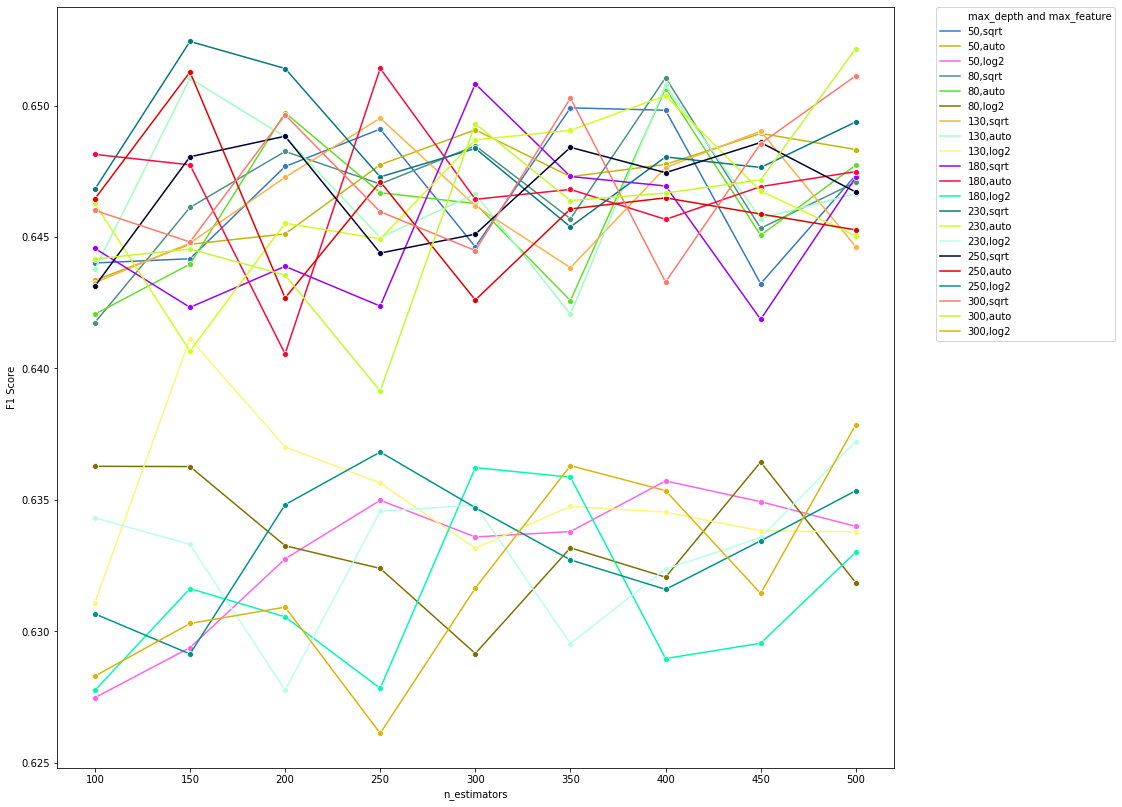

In [33]:
# Plot for RF performance wrt to set of hyper parameter combination
results['max_depth']=results['max_depth'].astype(str)
results['max_features']= results['max_features'].astype(str)
results['max_depth and max_feature']=results['max_depth'] + "," + results['max_features']
results = results.drop(["max_depth", "max_features"], axis=1)

# Scatter line plot for RF under Grid Search CV
plt.figure(figsize=(15,14))
colors=["windows blue","olive yellow","candy pink","dusty teal","toxic green","ugly brown","butterscotch","light seafoam",
        "straw","vivid purple","neon red","greenish turquoise","deep aqua","lime yellow","pale aqua","dark navy blue",
       "red","teal","salmon","yellow green","gold"]
#print(len(colors))
ax=sns.lineplot(x=results['n_estimators'],y=results['F1 Score'],hue=results['max_depth and max_feature'],data=results,marker="o",palette =sns.xkcd_palette(colors)) 
# Put the legend in the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()

We can see in above graph that our model produces good results with max_features as 'sqrt' or 'auto' as compared to 'log2'. Similarly we can see which hyperparameter combination set can produce good results without using high resources such as memory i.e. memory efficient.

In [34]:
classifier = cv.best_estimator_   # estimator with best score
print(cv.best_params_)  # gives hyperparameter coressponding to best f1 score
print(cv.best_score_)   # gives best f1 score after cross-validation

{'max_depth': 230, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 150}
0.6524386193246139


<a id="RTD"></a>
### <u>Results on Test Dataset </u>
After training, the random forest with best score have following hyperparameter values;<br><br>
<b>n_estimators=200</b> ,
<b>min_samples_leaf=2</b> ,
<b>max_features=</b>'sqrt',
<b>max_depth= </b>180<br><br>
This trained Model is then applied to our Test dataset which resulted in following below mentioned results.

In [35]:
train_predictions = classifier.predict(train_X)
test_predictions = classifier.predict(test_X)
print("Train data Accuracy: ", round(100*accuracy_score(train_y, train_predictions),2))
print("Test Data Accuracy: ", round(100*accuracy_score(test_y, test_predictions),2))
print("Train Data F1: ", round(100*f1_score(train_y, train_predictions, average="macro"),2))
print("Test Data F1: ", round(100*f1_score(test_y, test_predictions, average="macro"),2))

Train data Accuracy:  98.71
Test Data Accuracy:  61.09
Train Data F1:  98.03
Test Data F1:  59.84


### Classifcation Report 

In [36]:
print(classification_report(test_y, test_predictions,target_names=class2label))   # Results with individual classes f1 scores

              precision    recall  f1-score   support

B-Deposition       0.96      0.46      0.62       101
  B-Creation       0.77      0.42      0.55       199
   B-Mention       0.47      0.77      0.59       644
     B-Usage       0.76      0.56      0.64      1045

    accuracy                           0.61      1989
   macro avg       0.74      0.55      0.60      1989
weighted avg       0.68      0.61      0.61      1989



<a id="RSCV"></a>
### 5.5.4.1.2 <u>Random Search Cross-Validation</u>
Random Search Cross-Validation is another method to evaluate RF performance. It takes random set of hyperparameters values and does not try out all possible combinations from search space.  The number of parameter settings that are tried is set by <b>n_iter</b>.<br>


In [37]:
rf = RandomForestClassifier( n_jobs=-1)
# specify parameters and distributions to sample from
param_dist = {"n_estimators": sp_randint(100, 1200),"max_depth": [100, 500],"min_samples_leaf":[2],
              "max_features": ['sqrt','log2', 'auto'],
              "min_samples_split": sp_randint(2, 3)}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=10, cv=3, random_state=0)

random_search.fit(train_X, train_y)  # training
print(random_search.best_params_)    # best estimator parameters

KeyboardInterrupt: 

<a id="RTDR"></a>
### 5.5.4.1.2.1 <u>Model Deployment and Updating</u>

After training with Random Search CV, we applied the model to our training dataset, which gave us following result;

In [ ]:
y_preds = random_search.predict(test_X)
print("Test Data F1: ", round(100*f1_score(test_y, y_preds, average="macro"),2))

<a id="D&I"></a>
### 5.6 <u>Model Deployment</u>
This part is out of my work scope.

<a id="DAC"></a>
## 6. <u>Discussion and Conclusion</u> 

Random Forest Classifier results with word embeddings as feature space provided good results. We have achieved 65% F1 score on validation dataset and 60.37 on our Test dataset.

Random forest Model generally overfits [[23]](#1). To avoid overfitting, hyperparameter tuning needs to be done. In our problem, overfitting also occurred as we can see model had really good F1 score with training data as compared to test data. We did hyperparameter tuning by using Grid Search Cross-validation and Random Search Cross-validation. Total 189 number of hyperparameter combinations under Grid Search CV were checked for the best fitting model for our problem. This process resulted in reduced overfitting but not completely. If we see at classification report above, it can be seen that 'Usage' and 'Deposition' class mentions F1 score of 0.65 and 0.61 respectively are good. 

A better picture can be seen by looking at below confusion matrix for test data. Our Model is not really good in deciding between 'Mention' and 'Usage' Software mentions. A number of 'Usage' software mentions are being incorrectly classified as 'Mention'. Other than that, confusion matrix shows good performance for our problem. On observing the reasons, i found two of the following;
<ol>
    <li>We used window size of 3 for capturing contextual features in section 5.4.4.1. If three or more software names comes together in contextual feature array, then there is very less information for classifier to predict the right class because most of the features will be occupied by software names themselves. A possible solution might be to use large window size for sentences in which three or more software names appear.</li><br>
    <li>Contextual feature array in which software name entity comes in start or at the end, then we use padding(('PAD') to fill our contextual array. For Example, ' XYZ Software that we previously used, failed this time'.
The contextual features array will be like;
['PAD', 'PAD', 'PAD', 'xyz', 'Software', 'that', 'we']

Also in this case, there is very less information for classifier to predict the right class. </li>
</ol>
The above issues need to be resolved for better results. To conclude, We have implemented Random Forest Classifier for classifying Software Mentions on text dataset from Bio-medical and social sciences articles. Word Embeddings have been used as feature space. Overfitting was reduced with Cross-Validation methods(Grid Search CV & Random Search CV). The RF model is being trained on full potential and provided fine results. 

<a id="FI"></a>
### 6.1 <u>Future Possible Improvements</u> 
We can further improve our model's performance by utilizing some options;

<ol>
    <li>We can have close look at the sentences from 'Usage' and 'Mention' classes which are wrongly classified and may improve our feature space. Similarly, size of Training dataset may be increased for more learning.</li><br>
    <li>Data Annotation requires concentration and background knowledge. To have the certainty of annotated data, it must be annotated by three or more annotators <b>[24]</b>. I have annotated Social Sciences dataset only by myself. Therefore, i do not any measure of how good i have done annotations on my dataset.</li>
    <li>We can use better pre-trained Word Embeddings for our problem.</li>
    <li>Another option for achieving better performance is to use more advanced pre-trained models like Bert or SciBert <b>[25]</b>, which have their own extensively trained embeddings, with same feature space for our problem.</li>
</ol>


In [67]:
def confusion_matrix_plot(true, model, X, label2class=label2class, class2label=class2label):
    true_classes = [label2class[value] for value in true]
    labels = list(label2class.values())
    plot_confusion_matrix(model, X, true, display_labels=labels,normalize='true')
    plot_confusion_matrix(model, X, true, display_labels=labels,normalize='pred')
    plot_confusion_matrix(model, X, true, display_labels=labels,normalize=None)
    plot_confusion_matrix(model, X, true, display_labels=labels,normalize='all')
    #plot_confusion_matrix(model, X, true, display_labels=labels, xticks_rotation="vertical")
    plt.xlabel("Predicted")
    plt.ylabel("True")

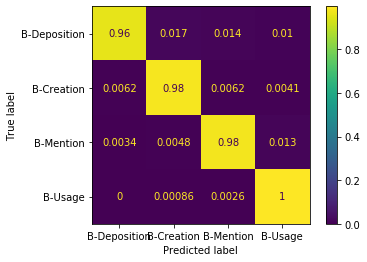

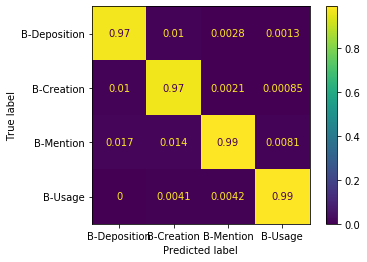

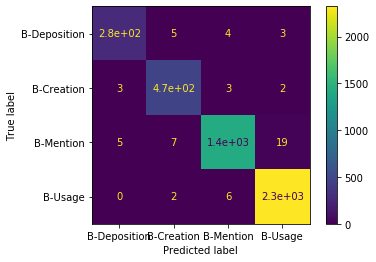

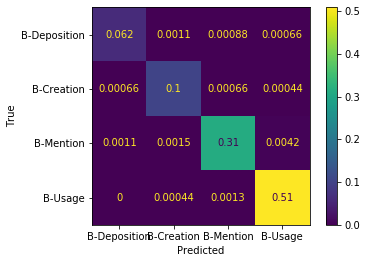

In [68]:
confusion_matrix_plot(train_y, classifier, train_X)

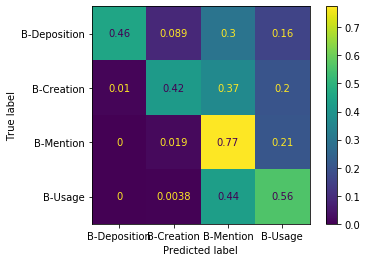

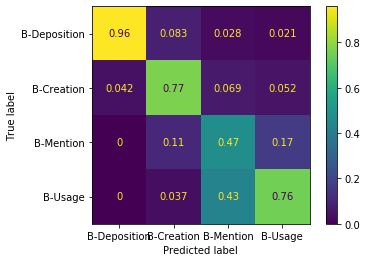

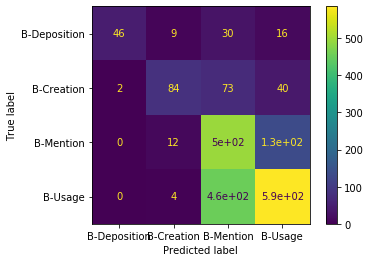

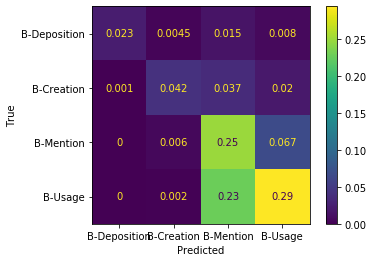

In [69]:
confusion_matrix_plot(test_y,  classifier, test_X)

# 16.<u> References <u/>
 <a id="reference"></a>
    
    
[1]. https://www.investopedia.com/terms/a/artificial-intelligence-ai.asp
    
[2]. https://en.wikipedia.org/wiki/Natural_language_processing
    
[3]. https://www.statista.com/statistics/607891/worldwide-natural-language-processing-market-revenues/<a id="1"></a>
    
[4]. Schindler, D., Yordanova, K., & Krüger, F. (2019). An annotation scheme for references to research artefacts in scientific publications. In 2019 ieee international conference on pervasive computing and communications workshops (percom workshops) (pp. 52–57)<a id="1"></a>



[5]. https://developer.ibm.com/technologies/artificial-intelligence/data/groningen-meaning-bank/<a id="1"></a>
    

    
[6]. Poostchi, H., Borzeshi, E. Z., & Piccardi, M. (2018). Bilstm-crf for persian named-entity recognition armanpersonercorpus:
The first entityannotated persian dataset. In Proceedings of the eleventh international conference on language resources and evaluation (lrec 2018).<a id="1"></a>
    
[7]. Taher, E., Hoseini, S. A., & Shamsfard, M. (2020). Beheshti-ner: Persian named
entity recognition using bert. arXiv preprint arXiv:2003.08875.<a id="1"></a>

[8]. https://infohub.delltechnologies.com/l/machine-learning-using-red-hat-openshift-container-platform-5/ml-workflow 
    
[9]. Stenetorp, P., Pyysalo, S., Topi´c, G., Ohta, T., Ananiadou, S., & Tsujii, J. (2012).Brat: a web-based tool for nlp-assisted text annotation. In Proceedings of the demonstrations at the 13th conference of the european chapter of the association for computational linguistics (pp. 102–107).<a id="1"></a>
    
[10]. https://brat.nlplab.org/standoff.html
    

    
    
[11]. Loper, E., & Bird, S. (2002). Nltk: the natural language toolkit. arXiv preprintcs/0205028. <a id="1"></a>
    
[12]. Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of word representations in vector space. arXiv preprint arXiv:1301.3781.<a id="1"></a>

[13]. Ji, S., Satish, N., Li, S., & Dubey, P. K. (2019). Parallelizing word2vec in shared and distributed memory. IEEE Transactions on Parallel and Distributed Systems, 30(9), 2090–2100.
    
[14]. http://evexdb.org/pmresources/vec-space-models/<a id="1"></a>
    
[15]. http://bio.nlplab.org/<a id="1"></a>    
    
[16]. Rehurek, R.,&Sojka, P. (2010,May 22). Software Framework for TopicModelling with Large Corpora. In Proceedings of the LREC 2010 Workshop on NewChallenges for NLP Frameworks (pp. 45–50). Valletta,Malta: ELRA.

[17]. https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f 
    
[18]. https://www.kdnuggets.com/2018/12/guide-decision-trees-machine-learning-data-science.html<a id="1"></a>
    
[19]. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., . . .others (2011). Scikit-learn: Machine learning in python. the Journal of machine Learning research, 12, 2825–2830.
    
[20]. thatascience.com/learn-machine-learning/gini-entropy/<a id="1"></a>
        
[21]. scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html<a id="1"></a>
    
[22]. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html<a id="1"></a>

[23]. shorturl.at/bjoJY
    
[24]. https://www.lighttag.io/how-to-label-data/
    
[25]. Beltagy, I., Lo, K., & Cohan, A. (2019). Scibert: A pretrained language model for
scientific text. arXiv preprint arXiv:1903.10676. 